In [34]:
!pip install --upgrade imblearn
!pip install scikit-learn==1.0 -U

In [35]:
from collections import Counter


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
)

from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE

from imblearn.ensemble import (
    BalancedBaggingClassifier,
    BalancedRandomForestClassifier,
    RUSBoostClassifier,
    EasyEnsembleClassifier,
)

In [36]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
pima_dataframe = pd.read_csv(path, header=None)
pima_dataframe

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [37]:
pima_values = pima_dataframe.values
pima_values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [38]:
pima_values.shape

(768, 9)

In [39]:
pima_data, pima_labels = pima_values[:,:8],pima_values[:,8]

In [40]:
pima_labels

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [41]:
pima_data.shape, pima_labels.shape

((768, 8), (768,))

In [42]:
pima_labels_classes = np.unique(pima_labels)
pima_labels_classes

array([0., 1.])

In [43]:
pima_number_classes = len(pima_labels_classes)

In [44]:
pima_number_classes

2

In [45]:
for label in pima_labels_classes:
    total = len(pima_labels[pima_labels==label])
    ratio = (total / float(len(pima_labels))) * 100
    print(f' the number of class {label} is {total} and the ratio of this class is {ratio} to all data')

 the number of class 0.0 is 500 and the ratio of this class is 65.10416666666666 to all data
 the number of class 1.0 is 268 and the ratio of this class is 34.89583333333333 to all data


In [46]:
pima_dataframe_new =pima_dataframe.sort_values(8)

In [47]:
pima_dataframe_new

,0,1,2,3,4,5,6,7,8
383,1,90,62,18,59,25.1,1.268,25,0
465,0,124,56,13,105,21.8,0.452,21,0
466,0,74,52,10,36,27.8,0.269,22,0
467,0,97,64,36,100,36.8,0.600,25,0
469,6,154,78,41,140,46.1,0.571,27,0
...,...,...,...,...,...,...,...,...,...
193,11,135,0,0,0,52.3,0.578,40,1
485,0,135,68,42,250,42.3,0.365,24,1
484,0,145,0,0,0,44.2,0.630,31,1
186,8,181,68,36,495,30.1,0.615,60,1


we want 10 percent of "1" label in all data we have 268 numbers of "1" that is 34.8 with cross multipling we find out we need 77 of "1" label 268-x=77 give us x equal to 191 but after applying this to data the percentage of "1" was 13.3 after i use try and error to find the appropriate number of "1" label and i find 56, 268-56=212

In [48]:
pima_dataframe_new_values =pima_dataframe_new.values

In [49]:
pima_dataframe_new_values.shape

(768, 9)

In [50]:
pima_values_adjusted = pima_dataframe_new_values[:-212,:]

In [51]:
pima_values_adjusted.shape

(556, 9)

In [52]:
X, Y = pima_values_adjusted[:, :-1], pima_values_adjusted[:, -1]

In [53]:
n_rows = X.shape[0]
n_cols = X.shape[1]
classes = np.unique(Y)
n_classes = len(classes)

In [54]:
print('N Examples: %d' % n_rows)
print('N Inputs: %d' % n_cols)
print('N Classes: %d' % n_classes)
print('Classes: %s' % classes)

N Examples: 556
N Inputs: 8
N Classes: 2
Classes: [0. 1.]


In [55]:
for c in classes:
    total = len(Y[Y == c])
    ratio = (total / len(Y)) * 100
    print(' - Class %s: %d (%.5f%%)' % (str(c), total, ratio))

 - Class 0.0: 500 (89.92806%)
 - Class 1.0: 56 (10.07194%)


In [56]:
X, Y

(array([[  1.   ,  90.   ,  62.   , ...,  25.1  ,   1.268,  25.   ],
        [  0.   , 124.   ,  56.   , ...,  21.8  ,   0.452,  21.   ],
        [  0.   ,  74.   ,  52.   , ...,  27.8  ,   0.269,  22.   ],
        ...,
        [ 11.   , 136.   ,  84.   , ...,  28.3  ,   0.26 ,  42.   ],
        [  2.   ,  93.   ,  64.   , ...,  38.   ,   0.674,  23.   ],
        [  5.   ,  97.   ,  76.   , ...,  35.6  ,   0.378,  52.   ]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.,

# **RESAMPLING METHODS**

In [57]:
resampling_dict = {
    
    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=1375,
        replacement=False,
    ),

    'smote': SMOTE(
        sampling_strategy='auto',
        random_state=1375,
        k_neighbors=5,
        n_jobs=4,
    ),
}

In [58]:
# ensemble methods (with or without resampling)

ensemble_dict = {

    # balanced random forests (bagging)
    'balancedRF': BalancedRandomForestClassifier(
        n_estimators=20,
        criterion='gini',
        max_depth=3,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=1375,
    ),

    # bagging of Logistic regression, no resampling
    'bagging': BaggingClassifier(
        base_estimator=LogisticRegression(random_state=2909),
        n_estimators=20,
        n_jobs=4,
        random_state=1375,
    ),

    # bagging of Logistic regression, with resampling
    'balancedbagging': BalancedBaggingClassifier(
        base_estimator=LogisticRegression(random_state=1375),
        n_estimators=20,
        max_samples=1.0,  # The number of samples to draw from X to train each base estimator
        max_features=1.0,  # The number of features to draw from X to train each base estimator
        bootstrap=True,
        bootstrap_features=False,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=1375,
    ),

    # boosting + undersampling
    'rusboost': RUSBoostClassifier(
        base_estimator=None,
        n_estimators=20,
        learning_rate=1.0,
        sampling_strategy='auto',
        random_state=1375,
    ),

    # bagging + boosting + under-sammpling
    'easyEnsemble': EasyEnsembleClassifier(
        n_estimators=20,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=1375,
    ),
}

In [59]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(
        n_estimators=20, random_state=1375, max_depth=2, n_jobs=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    return roc_auc_score(y_test, pred[:, 1])

In [60]:
# function to train random forests and evaluate the peadaormance

def run_adaboost(X_train, X_test, y_train, y_test):

    ada = AdaBoostClassifier(n_estimators=20, random_state=1375)
    
    ada.fit(X_train, y_train)

    print('Train set')
    pred = ada.predict_proba(X_train)
    print(
        'AdaBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = ada.predict_proba(X_test)
    print(
        'AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    return roc_auc_score(y_test, pred[:, 1])

In [61]:
# function to train random forests and evaluate the peensembleormance

def run_ensemble(ensemble, X_train, X_test, y_train, y_test):
    
    ensemble.fit(X_train, y_train)

    print('Train set')
    pred = ensemble.predict_proba(X_train)
    print(
        'ensembleBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = ensemble.predict_proba(X_test)
    print(
        'ensembleBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    return roc_auc_score(y_test, pred[:, 1])

In [62]:
  x_train, x_test, y_train, y_test = train_test_split(
    X,  
    Y, 
    test_size=0.3,
    random_state=1375)

In [63]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((389, 8), (167, 8), (389,), (167,))

In [64]:
results_dict = {}
# we set variables in the same scale
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
    
# train model and store result
roc = run_randomForests(x_train, x_test, y_train, y_test)
results_dict["Random Forest"] = roc
print()
# train model and store result
roc = run_adaboost(x_train, x_test, y_train, y_test)
results_dict["adaboost"] = roc
print()


Train set
Random Forests roc-auc: 0.8986729644624382
Test set
Random Forests roc-auc: 0.8484340044742729

Train set
AdaBoost roc-auc: 0.9710601289548657
Test set
AdaBoost roc-auc: 0.6545488441461595



In [65]:
for sampler in resampling_dict.keys():
        
        print(sampler)
        
        # resample
        x_resampled, y_resampled = resampling_dict[sampler].fit_resample(x_train, y_train)
        
        # train model and store result
        roc = run_randomForests(x_resampled, x_test, y_resampled, y_test)
        results_dict[sampler] = roc
        print()
    
        for ensemble in ensemble_dict.keys():
        
          print(ensemble)
          
          # train model and store result
          roc = run_ensemble(ensemble_dict[ensemble], x_train, x_test, y_train, y_test)
          results_dict[ensemble] = roc
          print()
          

random
Train set
Random Forests roc-auc: 0.9307479224376731
Test set
Random Forests roc-auc: 0.8523489932885906

balancedRF
Train set
ensembleBoost roc-auc: 0.9210526315789473
Test set
ensembleBoost roc-auc: 0.8333333333333334

bagging
Train set
ensembleBoost roc-auc: 0.8768930874194033
Test set
ensembleBoost roc-auc: 0.8762117822520507

balancedbagging
Train set
ensembleBoost roc-auc: 0.8661718398560504
Test set
ensembleBoost roc-auc: 0.877703206562267

rusboost
Train set
ensembleBoost roc-auc: 0.9286249812565602
Test set
ensembleBoost roc-auc: 0.7026472781506339

easyEnsemble
Train set
ensembleBoost roc-auc: 0.9661868346078872
Test set
ensembleBoost roc-auc: 0.8288590604026845

smote
Train set
Random Forests roc-auc: 0.92640481814271
Test set
Random Forests roc-auc: 0.8558911260253542

balancedRF
Train set
ensembleBoost roc-auc: 0.9210526315789473
Test set
ensembleBoost roc-auc: 0.8333333333333334

bagging
Train set
ensembleBoost roc-auc: 0.8768930874194033
Test set
ensembleBoost roc

In [66]:
results_dict

{'Random Forest': 0.8484340044742729,
 'adaboost': 0.6545488441461595,
 'bagging': 0.8762117822520507,
 'balancedRF': 0.8333333333333334,
 'balancedbagging': 0.877703206562267,
 'easyEnsemble': 0.8288590604026845,
 'random': 0.8523489932885906,
 'rusboost': 0.7026472781506339,
 'smote': 0.8558911260253542}

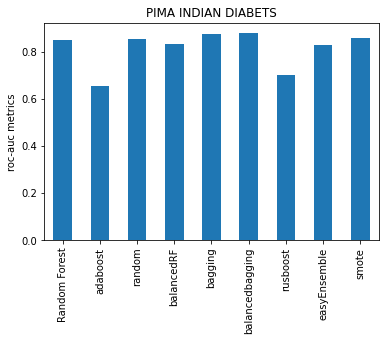

In [68]:
pd.Series(results_dict).plot.bar()
plt.title("PIMA INDIAN DIABETS")
plt.ylabel('roc-auc metrics')
plt.show()

# **resampling with bagging improves performance a little like balancedbagging in upper figure. this technique has additional steps to balance the training set **

# Cost-sensitive learning 

# now i choose balancedbagging for increesing precision with Cost-sensitive,
# my purpose of using this approach is deactivate imbalance effect

In [71]:
import numpy as np
import pandas as pd

from sklearn.base import clone


class MetaCost:
    """A procedure for making error-based classifiers cost-sensitive
    Adapted from https://github.com/Treers/MetaCost/blob/master/MetaCost.py
    .. note:: The form of the cost matrix C must be as follows:
    +---------------+----------+----------+----------+
    |  actual class |          |          |          |
    +               |          |          |          |
    |   +           | y(x)=j_1 | y(x)=j_2 | y(x)=j_3 |
    |       +       |          |          |          |
    |           +   |          |          |          |
    |predicted class|          |          |          |
    +---------------+----------+----------+----------+
    |   h(x)=j_1    |    0     |    a     |     b    |
    |   h(x)=j_2    |    c     |    0     |     d    |
    |   h(x)=j_3    |    e     |    f     |     0    |
    +---------------+----------+----------+----------+
    | C = np.array([[0, a, b],[c, 0 , d],[e, f, 0]]) |
    +------------------------------------------------+
    """

    def __init__(self, estimator, cost_matrix, n_estimators=50, n_samples=None, p=True, q=True):
        """
        Parameters
        ----------
        estimator :
            An sklearn classifier
        cost_matrix :
            The cost matrix
        n_estimators :
            The number of estimators in the ensemble
        n_samples :
            The number of samples to train each estimator
        p :
            Is True if the estimator produces class probabilities. False otherwise
        q :
            True if all samples are to be used for each example
        """

        self.estimator = estimator
        self.cost_matrix = cost_matrix
        self.n_estimators = n_estimators
        self. n_samples = n_samples
        self.p = p
        self.q = q

    def fit(self, X, y):
        """
        Parameters
        ----------
        X :
            Training set
        y :
            Target
        """

        if not isinstance(X, pd.DataFrame):
            raise ValueError('S must be a DataFrame object')

        X = X.copy()

        # reset index, helps with resampling
        X.reset_index(inplace=True, drop=True)
        y.index = X.index

        variables = list(X.columns)

        # concatenate
        S = pd.concat([X,y], axis=1)
        S.columns = variables + ['target']

        num_class = y.nunique()

        if not self.n_samples:
            self.n_samples = len(X)

        S_ = {} # list of subdatasets
        M = []  # list of models

        print('resampling data and training ensemble')
        for i in range(self.n_estimators):

            # Let S_[i] be a resample of S with self.n examples
            S_[i] = S.sample(n=self.n_samples, replace=True)

            X = S_[i][variables].values
            y = S_[i]['target'].values

            # Let M[i] = model produced by applying L to S_[i]
            model = clone(self.estimator)
            M.append(model.fit(X, y))

        print('Finished training ensemble')

        label = []
        S_array = S[variables].values
        # for each observation
        print('evaluating optimal class per observation')
        for i in range(len(S)):
            if self.q:
                # consider the predictions of all models
                M_ = M
            else:
                # consider the predictions of models which were not train on
                # this particular observation
                k_th = [k for k, v in S_.items() if i not in v.index]
                M_ = list(np.array(M)[k_th])

            if self.p:
                P_j = [model.predict_proba(S_array[[i]]) for model in M_]
            else:
                P_j = []
                vector = [0] * num_class
                for model in M_:
                    vector[model.predict(S_array[[i]])] = 1
                    P_j.append(vector)

            # Calculate P(j|x)
            # the average probability of each class, when combining all models
            P = np.array(np.mean(P_j, 0)).T

            # Relabel:
            label.append(np.argmin(self.cost_matrix.dot(P)))
        print('Finished re-assigning labels')

        # Model produced by applying L to S with relabeled y
        print('Training model on new data')
        X_train = S[variables].values
        y_train = np.array(label)
        self.estimator.fit(X_train, y_train)
        print('Finished training model on data with new labels')
        self.y_ = pd.Series(label)

    def predict(self, X):
        return self.estimator.predict(X)

    def predict_proba(self, X):
        try:
            probs = self.estimator.predict_proba(X)
        except:
            probs = None
            print('this estimator does not support predict_proba')
        return probs

In [72]:
balanced_bagging=BalancedBaggingClassifier(
        base_estimator=LogisticRegression(random_state=1375),
        n_estimators=20,
        max_samples=1.0,  # The number of samples to draw from X to train each base estimator
        max_features=1.0,  # The number of features to draw from X to train each base estimator
        bootstrap=True,
        bootstrap_features=False,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=1375,
    )

In [73]:
cost_matrix = np.array([[0, 1], [1, 0]])
cost_matrix

array([[0, 1],
       [1, 0]])

In [74]:
metacost_ = MetaCost(estimator=balanced_bagging,
                     cost_matrix=cost_matrix,
                     n_estimators=50,
                     n_samples=None,
                     p=True,
                     q=True)

In [77]:
x_train_df=pd.DataFrame(x_train)

In [78]:
y_train_df=pd.DataFrame(y_train)

In [79]:
metacost_.fit(x_train_df, y_train_df)

resampling data and training ensemble
Finished training ensemble
evaluating optimal class per observation
Finished re-assigning labels
Training model on new data
Finished training model on data with new labels


In [81]:
metacost_.predict_proba(x_train)

array([[0.80830493, 0.19169507],
       [0.91297877, 0.08702123],
       [0.96275297, 0.03724703],
       [0.86469656, 0.13530344],
       [0.85912318, 0.14087682],
       [0.65776114, 0.34223886],
       [0.92394977, 0.07605023],
       [0.77739477, 0.22260523],
       [0.91080197, 0.08919803],
       [0.74377069, 0.25622931],
       [0.07122527, 0.92877473],
       [0.9161612 , 0.0838388 ],
       [0.83216356, 0.16783644],
       [0.65582819, 0.34417181],
       [0.82943365, 0.17056635],
       [0.56979403, 0.43020597],
       [0.98174937, 0.01825063],
       [0.74444482, 0.25555518],
       [0.70494087, 0.29505913],
       [0.7798266 , 0.2201734 ],
       [0.75708084, 0.24291916],
       [0.85495917, 0.14504083],
       [0.77319752, 0.22680248],
       [0.85925686, 0.14074314],
       [0.31812435, 0.68187565],
       [0.45748197, 0.54251803],
       [0.2650615 , 0.7349385 ],
       [0.69735397, 0.30264603],
       [0.79303406, 0.20696594],
       [0.42032603, 0.57967397],
       [0.

In [84]:
print('Train set')
pred = metacost_.predict_proba(x_train)
print(
    'MetaCost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

print('Test set')
pred = metacost_.predict_proba(x_test)
print(
    'MetaCost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Train set
MetaCost roc-auc: 0.8336332283700705
Test set
MetaCost roc-auc: 0.8709917971662938


now we impose cost matrix

In [105]:
cost_matrix = np.array([[0, 10], [5, 0]])
cost_matrix

array([[ 0, 10],
       [ 5,  0]])

In [106]:
metacost2 = MetaCost(estimator=balanced_bagging,
                     cost_matrix=cost_matrix,
                     n_estimators=50,
                     n_samples=None,
                     p=True,
                     q=True)

In [107]:
np.unique(y_train)

array([0., 1.])

In [108]:
x_train_df

,0,1,2,3,4,5,6,7
0,0.000000,0.606218,0.540984,0.516667,0.222222,0.588910,0.228650,0.016667
1,0.076923,0.419689,0.590164,0.300000,0.047281,0.508604,0.112948,0.050000
2,0.000000,0.378238,0.000000,0.000000,0.000000,0.403442,0.145455,0.066667
3,0.076923,0.564767,0.475410,0.300000,0.137116,0.544933,0.077686,0.016667
4,0.076923,0.440415,0.540984,0.483333,0.000000,0.508604,0.150413,0.166667
...,...,...,...,...,...,...,...,...
384,0.230769,0.575130,0.508197,0.000000,0.000000,0.432122,0.035262,0.000000
385,0.000000,0.538860,0.622951,0.000000,0.000000,0.351816,0.277686,0.100000
386,0.000000,0.554404,0.622951,0.000000,0.000000,0.866157,0.334986,0.050000
387,0.538462,0.616580,0.000000,0.000000,0.000000,0.481836,0.072176,0.266667


In [109]:
y_train.shape

(389,)

In [110]:
np.unique(y_train)

array([0., 1.])

In [111]:
y_train_df=pd.DataFrame(y_train)

In [112]:
metacost2.fit(x_train_df, y_train_df)


resampling data and training ensemble
Finished training ensemble
evaluating optimal class per observation
Finished re-assigning labels
Training model on new data
Finished training model on data with new labels


In [116]:
print('Train set')
pred = metacost2.predict_proba(x_train)
print('MetaCost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

print('Test set')
pred = metacost2.predict_proba(x_test)
print('MetaCost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Train set
MetaCost roc-auc: 0.8343829659619133
Test set
MetaCost roc-auc: 0.8672632363907531
